# Problem Set 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
dataDir = "./data/"

# Question 1




In [3]:
# import lr_debug.py
# Note: this file was edited to find the data
# ./data/ was added on lines 54 and 58
# this code below runs the logistic models for datasets a and b but infinitely long so 
# DO NOT run outside of the false if statement unless you intend to interupt it.

from data import lr_debug

if False: # will not run the main function
    lr_debug.main()

In [4]:
colnames = ['y','x1','x2']
# dataset a
df_q1_a = pd.read_csv('./data/data_a.txt', sep="\s+", header=None, names = colnames)
df_q1_a["dataset"] = "a"
df_q1_a.head()

,y,x1,x2,dataset
0,-1.0,0.601266,0.165091,a
1,1.0,0.871725,0.527361,a
2,-1.0,0.372548,0.446609,a
3,-1.0,0.013577,0.051358,a
4,1.0,0.583032,0.710619,a


In [5]:
# dataset b
df_q1_b = pd.read_csv('./data/data_b.txt', sep="\s+", header=None, names = colnames)
df_q1_b["dataset"] = "b"
df_q1_b.head()

,y,x1,x2,dataset
0,-1.0,0.595663,0.193072,b
1,-1.0,0.436997,0.544807,b
2,1.0,0.899945,0.845922,b
3,-1.0,0.555064,0.009263,b
4,-1.0,0.074687,0.282845,b


# Part A

When training the logistic regression with dataset b the model does not converge

# Part B

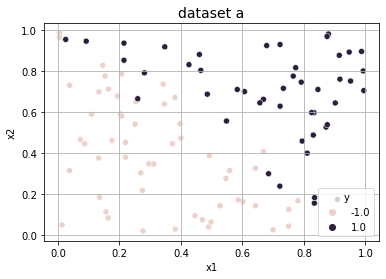

In [6]:
sns.scatterplot(data=df_q1_a, x="x1", y="x2", hue = "y")
plt.title("dataset a", fontsize = 14)
plt.grid(True)

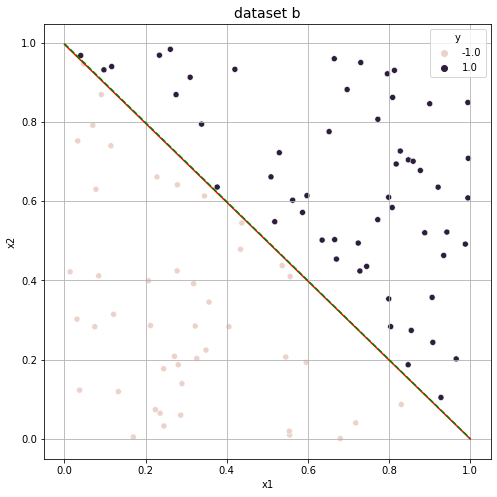

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.scatterplot(data=df_q1_b, x="x1", y="x2", hue = "y")
plt.title("dataset b", fontsize = 14)
plt.grid(True)

theta1 = [-52.74109217, 52.92982273, 52.69691453]
theta2 = [-68.10040977, 68.26496086, 68.09888223]

def getx2(x1, theta):
    """
    returns values of x2 given an input of theta to plot
    """
    x2 = (theta[2] + theta[0]*x1)/theta[1] 
    return x2

x1 = np.array([0, 1])
plt.plot(x1, getx2(x1,theta1), color = "r")
plt.plot(x1, getx2(x1,theta2), "--", color = "g")


In [8]:
# combine the datasets
df_q1_comb = pd.concat([df_q1_a, df_q1_b])
df_q1_comb

,y,x1,x2,dataset
0,-1.0,0.601266,0.165091,a
1,1.0,0.871725,0.527361,a
2,-1.0,0.372548,0.446609,a
3,-1.0,0.013577,0.051358,a
4,1.0,0.583032,0.710619,a
...,...,...,...,...
95,1.0,0.817329,0.693709,b
96,-1.0,0.037212,0.122634,b
97,1.0,0.097158,0.931522,b
98,1.0,0.807512,0.583752,b


Text(0.5, 1.0, 'data from both datasets')

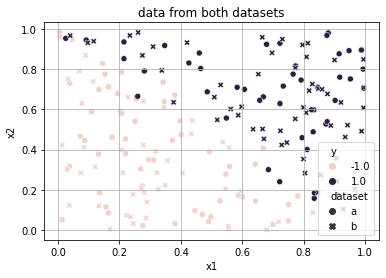

In [9]:
sns.scatterplot(data=df_q1_comb, x="x1", y="x2", hue = "y", style = "dataset")
plt.grid(True)
plt.title("data from both datasets")

In [10]:
ranka = np.linalg.matrix_rank(df_q1_a[["y", "x1", "x2"]].values)
rankb = np.linalg.matrix_rank(df_q1_b[["y", "x1", "x2"]].values)

print(f"{ranka = }, {rankb = }")

ranka = 3, rankb = 3


both datasets have a rank of 3 which means the problem is not that the data is x2 is linerally dependent of x1 and y. This looked aparent from plotting the dataset but I just wanted to make sure.

When editing the plot of dataset b in chunk __ I noticed that the theta vectors from 10,000 and 20,000 iterations are a multiple of each other. Upon further inspection it appears that the data is linearlly seperable. This implies $\theta$ is not a point but a plane and we are trying to minimize the loss function which happens when we reach inf values because the sigmoid function bounds $p(y\vert x)$ between 0 and 1 and we cannot get actually get exactly 0 or 1 with it. 

# Part C

* i

This would not help. The learning rate does not affect the gradient at a given set of theta, thus the model would not converge.

* ii

This would not help. The learning rate does not affect the gradient at a given set of theta, thus the model would not converge.

* iii

This would help. As theta increases eventually the penalty term would overtake any gains in the loss function and would allow for the model to converge.

* iv

This would not help. Changing the data linearly implies that the data is still linearlly seperable. 

* v

This would potentially help. If noise is added the the data might not be linearlly seperable any longer but this is not a guarantee. 

# Part D

SVM's using the hinge loss are not vulnerable to datasets that are linearlly seperable because they work to find the geometric margin not the functional margin.

# Question 2

# Part A

$$
\nabla J(\theta) = \sum_{i=1}^m \left(y^{(i)}- h_{\theta}\left(x^{(i)}\right)\right) = X^T\left(Y- h_{\theta}\left(X\right)\right)
$$

where

$$
X^T = 
\begin{bmatrix}
\mid & \mid & & \mid \\
x^{(1)} & x^{(2)} & \vdots & x^{(m)} \\
\mid & \mid & & \mid \\
\end{bmatrix} 
= 
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \vdots & \vdots \\
x^{(1)}_d & x^{(2)}_d & \vdots & x^{(m)}_d \\
\end{bmatrix}
$$

$$
Y = 
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix} 
$$

Let $\theta^{*}$ be the set of parameters minimizes $J(\theta)$ ie $\nabla J(\theta^*) = 0$. Thus we get

$$
X^T\left(Y- h_{\theta^*}\left(X\right)\right) = 0
$$

$$
\implies \begin{bmatrix}
1 & 1 & \cdots & 1 \\
x^{(1)}_1 & x^{(2)}_1 & \cdots & x^{(m)}_1 \\
x^{(1)}_2 & x^{(2)}_2 & \cdots & x^{(m)}_2 \\
\vdots & \vdots & \vdots & \vdots \\
x^{(1)}_d & x^{(2)}_d & \vdots & x^{(m)}_d \\
\end{bmatrix}
\begin{bmatrix}
y^{(1)} - P(y^{(1)}=1 \vert x^{(1)}; \theta^*)\\
y^{(2)} - P(y^{(2)}=1 \vert x^{(2)}; \theta^*)\\
\vdots \\
y^{(m)} - P(y^{(im)}=1 \vert x^{(m)}; \theta^*)
\end{bmatrix} 
 = 0
$$

$$
\implies \sum_{i=1}^m  y^{(i)} - P(y^{(i)}=1 \vert x^{(i)}; \theta^*) = 0
$$

$$
\implies \frac{1}{m}\sum_{i=1}^m  y^{(i)} = \frac{1}{m}\sum_{i=1}^m P(y^{(i)}=1 \vert x^{(i)}; \theta^*)
$$

$$
\implies \frac{\sum_{i = 1}^m I(y^{(i)}=1)}{\vert \{i \in I_{(0,1)}\} \vert} = \frac{\sum_{i\in I_{(0,1)}} P(y^{(i)}=1 \vert x^{(i)}; \theta)}{\vert \{i \in I_{(0,1)}\} \vert}
$$

which is what we wanted to show.

# Part B

* Does a perfectly calibrated model imply the model achieves perfect accuracy?

No. Assume for the sake of contradiction that a perfectly calibrated model implies the model achieves perfect accuracy. let $(a,b) = (0.5, 1)$ then all predictions are $y^{(i)} = 1$ for $i \in I_{(0.5,1)}$ (if $I_{(0.5,1)}$ is empty then switch the signs of all y's). However $P(y^{(i)}=1 \vert x^{(i)}; \theta) < 1$, thus 

$$
\sum_{i\in I_{(0.5,1)}} P(y^{(i)}=1 \vert x^{(i)}; \theta) < \vert S \vert = \sum_{i\in I_{(0.5,1)}} I(y^{(i)} = 1) = \sum_{i\in I_{(0.5,1)}} y^{(i)}
$$

where $\vert S \vert = \vert I_{(0.5,1)} \vert$. However, our model is perfectly calibrated which implies 

$$
\sum_{i\in I_{(0.5,1)}}  y^{(i)} = \sum_{i\in I_{(0.5,1)}} P(y^{(i)}=1 \vert x^{(i)}; \theta)
$$

which is a contradiction, Thus a perfectly calibrated model does not imply the model achieves perfect accuracy. QED


* Converse - Does a model that achieves perfect accuracy imply the model is perfectly calibrated?

Assume a Model achieves perfect accuracy. If the model, $h_\theta(x)$ outputs 0 or 1 for all $x$ then $\vert I_{(a,b)} \vert = 0$ for all sets of $(a,b)\subseteq (0,1)$. Thus

$$
\sum_{i\in I_{(a,b)}}  y^{(i)} = 0 = \sum_{i\in I_{(a,b)}} P(y^{(i)}=1 \vert x^{(i)}; \theta)
$$

which implies the model is perfectly calibrated.

However, if the model has output in $[0,1]$ and there exsts $x^*$ such that $h_\theta(x^*) \in (0,1)$. WLOG pick an $x^*$ such that $h_\theta(x^*) > 0.5$. Then let $(a,b) = (0.5, 1)$, then all predictions are $y^{(i)} = 1$ for $i \in I_{(0.5,1)}$ and $\vert I_{(0.5,1)}\vert = \vert S \vert > 0$. Thus we get

$$
P(y^{(i)}=1 \vert x^{(i)}; \theta) < 1
$$

$$
\implies \sum_{i\in I_{(0.5,1)}} P(y^{(i)}=1 \vert x^{(i)}; \theta) < \vert S \vert < \sum_{i\in I_{(0.5,1)}} y^{(i)}
$$

which implies the model is not perfectly calibrated. 

Thus we have shown that perfect accuracy implies perfect calibration when the range of $h_\theta(x)$ is $\{0,1\}$ but not when the range is a subset of $[0,1]$.

# Part C

$L_2$ regularization will decrease the magnitude of the parameters. Decreasing the magnitude of the parameters implies $\theta^Tx$ will have a smaller magnitude, thus our prediction for x is less confident, therefore $L_2$ regularization "pushes" $h_\theta(x)$ closer to 0.5. This decreases our confidence of each prediction, but will help prevent overfitting. Note: this explination assumes the regularization occurs on the bias term as well. If the regularization does not occur on the bias term then the prediction will get closer to $p(y)$ instead of 0.5.

# Question 3

Assume for the sake of contradiction that $\Vert \theta_{MAP} \Vert_2 > \Vert \theta_{ML} \Vert_2$. By definition of the maximum likelihood estimate

$$
\prod_{i=1}^m p(y^{(i)}\vert x^{(i)}; \theta_{ML}) \ge \prod_{i=1}^m p(y^{(i)}\vert x^{(i)}; \theta_{MAP})
$$



Additionally, $p(\theta_{ML}) > p(\theta_{MAP})$ because $p(\theta)$ decrease when the magnitude of $\theta$ increases, so we get

$$
p(\theta_{ML})\prod_{i=1}^m p(y^{(i)}\vert x^{(i)}; \theta_{ML}) > p(\theta_{MAP})\prod_{i=1}^m p(y^{(i)}\vert x^{(i)}; \theta_{MAP})
$$

which is a contradiction because $\theta_{MAP}$ is the $\arg\max p(\theta)\prod_{i=1}^m p(y^{(i)}\vert x^{(i)}; \theta)$ so $p(\theta_{ML})\prod_{i=1}^m p(y^{(i)}\vert x^{(i)}; \theta_{ML})$ cannot be greater than $p(\theta_{MAP})\prod_{i=1}^m p(y^{(i)}\vert x^{(i)}; \theta_{MAP})$. Thus $\Vert \theta_{MAP} \Vert_2 \le \Vert \theta_{ML} \Vert_2$. QED

# Question 4

* (a) $k_1 + k_2$

Is a Kernel.

$$
x^T (K_1 + K_2) x = x^TK_1x + x^TK_2x \ge 0
$$

* (b) $K_1 - K_2$

Is not a kernel. Let $K_2 = 2K_1$ so we get

$$
x^T(K_1-K_2)x = x^T(-K_1)x = -\left(x^TK_1x\right) \le 0
$$

* (c) $aK_1$, $a \ge 0$

Is a Kernel.

$$
x^TaK_1x = a\left(x^TK_1x\right) \ge 0
$$

* (d) $-aK_1$

Is not a Kernel.

$$
x^T\left(-aK_1\right)x = -a\left(x^TK_1x\right) \le 0
$$

* (e) $K_1K_2$

Is a Kernel.



Could not figure this out. If matrices $A,B$ are PSD then it is not gauranteed that $AB$ is psd as seen [here](https://math.stackexchange.com/questions/113842/is-the-product-of-symmetric-positive-semidefinite-matrices-positive-definite). 

Let $K_p(x,z) = K_1(x,z)K_2(x,z)$. 

the solution can be found here

https://home.ttic.edu/~dmcallester/ttic101-07/lectures/kernels/kernels.pdf

https://stats.stackexchange.com/questions/48509/proof-of-closeness-of-kernel-functions-under-pointwise-product

https://www.reddit.com/r/learnmachinelearning/comments/92p693/is_the_product_of_two_kernels_as_in_svms_also/

https://www.quora.com/How-do-I-formally-proof-the-product-of-two-kernels-is-a-kernel-If-K1-x-x1-and-K2-x-x2-are-both-kernel-function-then-K1-x-x1-K2-x-x2-is-also-a-kernel

* (f) $f(x)f(z)$

Is not a Kernel. let $f(y) = y$ and let $x,z\in \mathbb{R}$. If $v\in\mathbb{R}$, $x=1$ and $z = -1$ then $vf(x)f(z)v = -v^2 < 0$ so $f(x)f(z)$ is not PSD.

* (g) $K_3(\phi(x),\phi(z))$

Is a Kernel. We know that a vector $x \in \mathbb{R}^n$ and $\phi(x) \subseteq \mathbb{R}^d$. Since $K_3$ is a kernel in $\mathbb{R}^d$ it is also a kernel for any subset of $\mathbb{R}^d$. Since $\phi(x) \subseteq \mathbb{R}^d$ $K_3$ is a kernel for $\phi(x),\phi(z)$.

* (h) $p(K_1(x,z))$

Is a Kernel. 

$$
y^Tp(K_1(x,z))y = y^T \sum_{i=1}^\infty \left(a_i K_1^i\right) y = \sum_{i=1}^\infty a_i y^TK_1^iy
$$

By definition $a_i \ge 0$. $y^TK_1^iy \ge 0$, which folows from applying induction to part e so $a_i y^TK_1^iy \ge 0$ for all $i$, thus the sum is $\ge 0$ so $p(K_1(x,z))$ is PSD. QED

# Question 5

This yt video does a good job explining the problem

https://www.youtube.com/watch?v=cIxfFoPHe3M

# Part A

$y\in\{-1,1\}$

$g(z) = sign(z)$

$h_\theta(x) = g(\theta^Tx)$

The high-dimensional parameter vector $\theta^{(i)}$

For this problem assume at some point $\theta$ can be represented as 

$$
\theta^{(i)} = \sum_{j=1}^n \beta_j^{(i)} \phi\left(x^{(j)}\right)
$$

Let $c_i$ be 0 if the $i^{th}$ training example is predicted correctly and 1 if the model makes the incorrect prediction using $\theta^{(i-1)}$. Thus

$$
\theta^{(i)} = \theta^{(i-1)} + \alpha c_i y^{(i)} \phi(x^{(i)}) = \sum_{j=1}^i \alpha c_j y^{(j)} \phi(x^{(j)})
$$

Thus $\beta_j = \alpha c_j y^{(j)}$. The high-dimensional parameter vector $\theta^{(i)}$ can thus be represented in terms of $\beta$'s.

# Part B

$$
h_{\theta^{(i)}}(x^{(i+1)}) = g(\theta^{(i)T}x^{(i+1)})
$$

$$
= g \left(\sum_{j=1}^n \beta_j^{(i)} \phi(x^{(j)})^T \phi(x^{(i+1)})\right)
$$

Let our kernel be the dot prodct of our transformation $\phi$, so our kernel is

$$
K(x^{(k)},x^{(l)}) = \langle\phi\left(x^{(k)}\right),\phi\left(x^{(l)}\right)\rangle
$$

Thus we get

$$
h_{\theta^{(i)}}(x^{(i+1)}) = g \left(\sum_{j=1}^n \beta_j^{(i)} \phi(x^{(j)})^T \phi(x^{(i+1)})\right) = g \left(\sum_{j=1}^n \beta_j^{(i)} K\left(x^{(j)}, x^{(i+1)}\right)\right) 
$$


# Part C

Initialize $c_1:c_n$ to 0.

For i in 1 to n:

&emsp; If $\left(y^{(i)} \sum_{j=1}^n \alpha c_j y^{(j)} K(x^{(j)}, x^{(i)}) < 0\right)$:

&emsp;&emsp; $c_i = 1$

# Question 6

$$
\phi_{y=1} = \frac{\#(y^{(i)} = 1)}{n}
$$

$$
\phi_{y=0} = \frac{\#(y^{(i)} = 0)}{n} = 1 - \phi_{y=1}
$$

$$
\phi_{k\vert y = 1} = \frac{1 + \sum_{i=1}^n \sum_{j=1}^{d_i} I\left(x_j^{(i)} = k \wedge y^{(i)} = 1 \right)}{\vert V \vert + \sum_{i=1}^n I\left(y^{(i)} = 1 \right)d_i}
$$

$$
\phi_{k\vert y = 0} = \frac{1 + \sum_{i=1}^n \sum_{j=1}^{d_i} I\left(x_j^{(i)} = k \wedge y^{(i)} = 0 \right)}{\vert V \vert + \sum_{i=1}^n I\left(y^{(i)} = 0 \right)d_i}
$$

-----

$$
P(y\vert x) = \frac{p(x\vert y)p(y)}{p(x)}
$$

$$
= \frac{p(x\vert y)p(y)}{p(x\vert y = 1)p(y=1) + p(x\vert y = 0)p(y=0)}
$$

$$
= \frac{\prod_{j=1}^d p(x_j\vert y)p(y)}{\prod_{j=1}^d p(x_j\vert y = 1)p(y=1) + \prod_{j=1}^d p(x_j\vert y = 0)p(y=0)}
$$

$$
= \frac{\phi_y \prod_{j=1}^d \phi_{k=x_j\vert y}}{\phi_{y=1} \prod_{j=1}^d \phi_{k=x_j\vert y}  + \phi_{y=0} \prod_{j=1}^d \phi_{k=x_j\vert y=0}}
$$

# Part A

$$
P(y=1\vert x) = \frac{p(x\vert y=1)p(y=1)}{p(x)}
$$

$$
= \frac{\prod_{j=1}^d p(x_j\vert y=1)p(y=1)}{\prod_{j=1}^d p(x_j\vert y = 1)p(y=1) + \prod_{j=1}^d p(x_j\vert y = 0)p(y=0)}
$$

$$
= \frac{\phi_{y=1} \prod_{j=1}^d \phi_{k=x_j\vert y=1}}{\phi_{y=1} \prod_{j=1}^d \phi_{k=x_j\vert y}  + \phi_{y=0} \prod_{j=1}^d \phi_{k=x_j\vert y=0}}
$$

$$
= \frac{1}{1 + \frac{\phi_{y=0} \prod_{j=1}^d \phi_{k=x_j\vert y=0}}{\phi_{y=1} \prod_{j=1}^d \phi_{k=x_j\vert y=1}}}
$$

$$
= \frac{1}{1 + \exp \log \frac{\phi_{y=0} \prod_{j=1}^d \phi_{k=x_j\vert y=0}}{\phi_{y=1} \prod_{j=1}^d \phi_{k=x_j\vert y=1}}}
$$

$$
= \frac{1}{1 + \exp \left(\log \phi_{y=0} + \sum_{j=1}^{d} \log \phi_{k=x_j\vert y=0} - \log \phi_{y=1} - \sum_{j=1}^{d} \log \phi_{k=x_j\vert y=1}\right)}
$$

The code for ```nb.py``` is pasted below. ```nb_train``` and ```nb_test``` have been filled in.

In [11]:
def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    state = {}
    N = matrix.shape[1]
    ###################
    # inputs
    # matrix:
    #    each row corresponds to a training example
    #    column k corresponds to how many times the kth word appeared in the training example (email).
    # category:
    #    0 -> not spam
    #    1 -> spam
    # The number of columns corresponds to our vector size. Above this is definded as N.
    # The output is the dict state. all phi values and log phi values are calculated and stored in it.
    V = N # vocabulary size
    
    # calculate phi_y and log phi_y
    state["phi_1"] = category.mean()
    state["phi_0"] = 1 - state["phi_1"]
    state["log_phi_1"] = np.log(state["phi_1"])
    state["log_phi_0"] = np.log(state["phi_0"])
    
    # calculate phi_(k|y=1)
    # col sum (np.sum(axix=0)) tells us how many time the kth word appears
    # the total amount of words in the sum over the entire spamMat matrix (spamMat.sum())
    # the 1 in the numerator and V in denominator are used as laplace smoothing
    spamMat = matrix[category == 1, :]
    state["phi_k_giv_y1"] = (1 + spamMat.sum(axis = 0))/(V + spamMat.sum())
    state["log_phi_k_giv_y1"] = np.log(state["phi_k_giv_y1"])
    
    # calculate phi_(k|y=0)
    # col sum (np.sum(axix=0)) tells us how many time the kth word appears
    # the total amount of words in the sum over the entire spamMat matrix (notSpamMat.sum())
    # the 1 in the numerator and V in denominator are used as laplace smoothing
    notSpamMat = matrix[category == 0, :]
    state["phi_k_giv_y0"] = (1 + notSpamMat.sum(axis = 0))/(V + notSpamMat.sum())
    state["log_phi_k_giv_y0"] = np.log(state["phi_k_giv_y0"])
    ###################
    return state

def nb_test(matrix, state):
    output = np.zeros(matrix.shape[0])
    ###################
    # inputs
    # matrix:
    #    each row corresponds to a training example
    #    column k corresponds to how many times the kth word appeared in the training example (email).
    # state:
    #     type: dict
    #    contains all phi and log phi parameters used to the value of each word.
    # output is the prediction for each test.
    
    sumLogPhis = state["log_phi_0"] - state["log_phi_1"] + matrix@(state["log_phi_k_giv_y0"] - state["log_phi_k_giv_y1"])
    prob = 1/(1+np.exp(sumLogPhis))
    output[prob > 0.5] = 1
    ###################
    return output

def evaluate(output, label):
    error = (output != label).sum() * 1. / len(output)
    print ('Error: %1.4f' % error)
    return error

def main():
    trainMatrix, tokenlist, trainCategory = readMatrix('./data/MATRIX.TRAIN')
    testMatrix, tokenlist, testCategory = readMatrix('./data/MATRIX.TEST')

    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)

    evaluate(output, testCategory)
    return

if __name__ == '__main__':
    main()


Error: 0.0163


In [12]:
trainMatrix, tokenlist, trainCategory = readMatrix('./data/MATRIX.TRAIN')
testMatrix, tokenlist, testCategory = readMatrix('./data/MATRIX.TEST')

In [13]:
type(trainMatrix), type(tokenlist), type(trainCategory)

(numpy.ndarray, list, numpy.ndarray)

In [14]:
"trainMatrix", trainMatrix.shape, "tokenlist", len(tokenlist), "trainCategory", trainCategory.shape

('trainMatrix', (2144, 1448), 'tokenlist', 1448, 'trainCategory', (2144,))

In [15]:
"testMatrix", testMatrix.shape, "tokenlist", len(tokenlist), "testCategory", testCategory.shape

('testMatrix', (800, 1448), 'tokenlist', 1448, 'testCategory', (800,))

Each row corresponds to a data entry and each column is the amount of times that the word appeares.

After filling in the required functions and implimenting naive bayes we obtain an error of 0.0163 or 1.63%.

# Part B

$$
\log \frac{p(x_j=i \vert y = 1)}{p(x_j=i \vert y = 0)} = \log \frac{\phi_{i\vert y=1}}{\phi_{i\vert y=1}} = \log \phi_{i\vert y=1} - \log \phi_{i\vert y=0}
$$

In [16]:
state = nb_train(trainMatrix, trainCategory)
places = np.argsort(state["log_phi_k_giv_y0"] - state["log_phi_k_giv_y1"])[:5]
np.array(tokenlist)[places]

array(['httpaddr', 'spam', 'unsubscrib', 'ebai', 'valet'], dtype='<U16')

The top 5 spam words are shown above. It appears that $y=0$ corresponds to spam contradicting what I wrote in the code above.

# Part C

In [17]:
df_error = pd.DataFrame({"trainSize":[50, 100, 200, 400, 800, 1400], "nbError":np.nan, "svmError":np.nan})

for idx, size in enumerate(df_error.trainSize):
    trainMatrix, tokenlist, trainCategory = readMatrix('./data/MATRIX.TRAIN.'+str(size))
    state = nb_train(trainMatrix, trainCategory)
    output = nb_test(testMatrix, state)
    df_error.loc[idx, "nbError"] = evaluate(output, testCategory)

Error: 0.0387
Error: 0.0262
Error: 0.0262
Error: 0.0187
Error: 0.0175
Error: 0.0163


(0.015, 0.04)

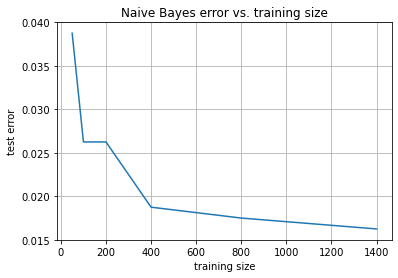

In [18]:
sns.lineplot(x = "trainSize",y = "nbError", data = df_error)
plt.grid(True)
plt.xlabel("training size")
plt.ylabel("test error")
plt.title("Naive Bayes error vs. training size")
plt.ylim((0.015, 0.04))

The training set with 1400 examples performed the best on the test data.

# Part D

In [19]:
from data import svm

In [20]:
testMatrix, tokenlist, testCategory = svm.readMatrix('./data/MATRIX.TEST')

for idx, size in enumerate(df_error.trainSize):
    trainMatrix, tokenlist, trainCategory = svm.readMatrix('./data/MATRIX.TRAIN.'+str(size))
    state = svm.svm_train(trainMatrix, trainCategory)
    output = svm.svm_test(testMatrix, state)
    df_error.loc[idx, "svmError"] = svm.evaluate(output, testCategory)

Error: 0.0275
Error: 0.0187
Error: 0.0075
Error: 0.0025
Error: 0.0000
Error: 0.0000


Text(0.5, 1.0, 'SVM error vs. training size')

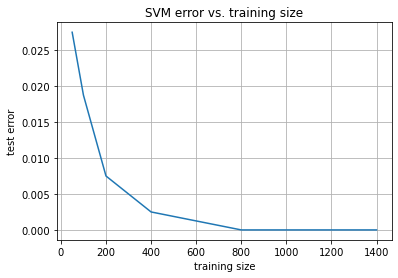

In [21]:
sns.lineplot(x = "trainSize",y = "svmError", data = df_error)
plt.grid(True)
plt.xlabel("training size")
plt.ylabel("test error")
plt.title("SVM error vs. training size")

# Part E

In [22]:
df_error.rename(columns={"nbError": "Naive Bayes", "svmError": "SVM"})
df_part_e = pd.melt(df_error.rename(columns={"nbError": "Naive Bayes", "svmError": "SVM"}),
                    id_vars = ["trainSize"], value_vars=['Naive Bayes', 'SVM'])

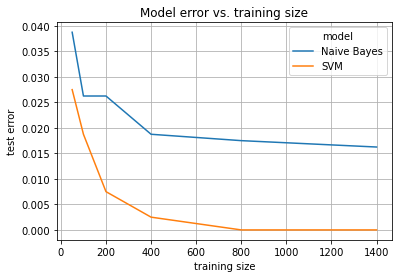

In [23]:
sns.lineplot(x = "trainSize",y = "value", hue = "variable", data = df_part_e)
plt.grid(True)
plt.xlabel("training size")
plt.ylabel("test error")
plt.title("Model error vs. training size")
plt.legend(title = "model")

The SVM model out performs the Naive Bayes model at every training set size.